## Visualizing n random or representative cell in a given well
- Inputs are:
    -  **file_name** - .sql file path for the target plate(or a dataframe)
    -  **well_name** - Well name
    -  **n_cells** - number of single cells you want to visualize
    -  **box_size** - size of box in pixels for cropping a cell
    -  **channels** - list of channels you want to plot
    -  **cell_selection_method** - can be one of the following methods
        - random - generate n randomly selected cells
        - representative - clusters the data and sample from the "closest to mean cluster"
        - geometric_median - plots single sample than is the geometric median of samples
        
        
#### Steps:

- Reading the target well from the input plate 
- Sampling using cell_selection_method 
  

In [3]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# from utils import read_data, visualize_data
# from utils.read_data import *
# from utils.visualize_data import *

from singlecell.read import read_single_cell_sql
from singlecell.process import extract_single_cell_samples
from singlecell.visualize import visualize_n_SingleCell
from singlecell.preprocess.filter_out_edge_single_cells import edgeCellFilter
# from sklearn.cluster import KMeans
import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
pwd

'/home/ubuntu/workspace_SingleCell/SingleCell_Morphological_Analysis'

In [ ]:
https://imaging-platform.s3.us-east-1.amazonaws.com/projects/2015_10_05_DrugRepurposing_AravindSubramanian_GolubLab_Broad/workspace/analysis/cell_outlines_Mito_Project/P24-SQ00015053/outlines/P24_s9--cell_outlines.png

### Inputs

In [4]:
file_name='/home/ubuntu/bucket/projects/2015_10_05_DrugRepurposing_AravindSubramanian_GolubLab_Broad'\
'/workspace/backend/2016_04_01_a549_48hr_batch1/SQ00015052/SQ00015052.sqlite'

n_cells=6

box_size=100

well_name=["A13"]

# repEnabled= True
# how we select cells which can be 'random','representative','geometric_median'
cell_selection_method='random'

channels=["Mito","AGP","DNA","RNA","ER"]

In [ ]:
# python restore_intelligent.py imaging-platform "projects/2015_10_05_DrugRepurposing_AravindSubramanian_GolubLab_Broad/workspace/backend/2016_04_01_a549_48hr_batch1/SQ00015195/"

### Read single cell data

In [5]:
%%time
df_p_s0=read_single_cell_sql.readSingleCellData_sqlalch_well_subset(file_name,well_name,"Image_Metadata_Well");

CPU times: user 5.56 s, sys: 6.6 s, total: 12.2 s
Wall time: 9min 4s


In [9]:
df_p_s0.shape,df_p_s.shape

((2164, 2442), (1925, 2442))

In [8]:
df_p_s,_ = edgeCellFilter(df_p_s0);

In [5]:
# df_p_s0.columns[df_p_s0.columns.str.contains('sm_Granularity')]

In [19]:
# df_p_s0['Image_Width_IllumAGP']
'Cells_AreaShape_MajorAxisLength' in df_p_s0.columns

True

In [ ]:
# df_p_s0[df_p_s0.columns[df_p_s0.columns.str.contains('utline')]]
# df_p_s0.columns[df_p_s0.columns.str.contains('Image_Width_OrigDNA')]

In [7]:
# import hdmedians as hd
# from skfda import FDataGrid
# from skfda.exploratory.stats import geometric_median    

In [3]:
"""
The following columns are needed for generation of single cell images,\
if you already have it just modify the config file,
if not you have to generate them
"""

single_cell_viz_config={'center_indicator_columns_x_y': ['Nuclei_Location_Center_X','Nuclei_Location_Center_Y'],\
                        'image_path_column_prefix':'PathName_Orig',
                        'image_name_column_prefix':'FileName_Orig'}

# original_im_size=sc_df['Image_Width_OrigDNA'].values[0]

In [17]:
# df_p_s

In [33]:
# df_p_s0['Nuclei_Location_Center_X']
# df_p_s,scdd = edgeCellFilter(df_p_s0, edge_margin = int(box_size/2));

In [7]:
df_p_s

ERROR! Session/line number was not unique in database. History logging moved to new session 44


,TableNumber,ImageNumber,ObjectNumber,Cells_AreaShape_Area,Cells_AreaShape_Center_X,Cells_AreaShape_Center_Y,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_EulerNumber,Cells_AreaShape_Extent,...,FileName_OrigMito,PathName_OrigAGP,FileName_OrigAGP,PathName_OrigDNA,FileName_OrigDNA,PathName_OrigRNA,FileName_OrigRNA,PathName_OrigER,FileName_OrigER,Path_Outlines
0,f7779d99f9a927a58189313ba7947287,109,1,10361,856.0,45.0,1.179354,0.752559,1.0,0.583784,...,r01c13f01p01-ch5sk1fk1fl1.png,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,r01c13f01p01-ch4sk1fk1fl1.png,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,r01c13f01p01-ch1sk1fk1fl1.png,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,r01c13f01p01-ch3sk1fk1fl1.png,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,r01c13f01p01-ch2sk1fk1fl1.png,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...
1,f7779d99f9a927a58189313ba7947287,109,2,10252,238.0,88.0,1.049000,0.600565,1.0,0.593150,...,r01c13f01p01-ch5sk1fk1fl1.png,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,r01c13f01p01-ch4sk1fk1fl1.png,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,r01c13f01p01-ch1sk1fk1fl1.png,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,r01c13f01p01-ch3sk1fk1fl1.png,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,r01c13f01p01-ch2sk1fk1fl1.png,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...
2,f7779d99f9a927a58189313ba7947287,109,3,14770,1564.0,136.0,1.060751,0.534683,1.0,0.574038,...,r01c13f01p01-ch5sk1fk1fl1.png,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,r01c13f01p01-ch4sk1fk1fl1.png,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,r01c13f01p01-ch1sk1fk1fl1.png,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,r01c13f01p01-ch3sk1fk1fl1.png,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,r01c13f01p01-ch2sk1fk1fl1.png,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...
3,f7779d99f9a927a58189313ba7947287,109,4,8472,763.0,100.0,1.107176,0.568269,1.0,0.597883,...,r01c13f01p01-ch5sk1fk1fl1.png,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,r01c13f01p01-ch4sk1fk1fl1.png,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,r01c13f01p01-ch1sk1fk1fl1.png,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,r01c13f01p01-ch3sk1fk1fl1.png,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,r01c13f01p01-ch2sk1fk1fl1.png,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...
4,f7779d99f9a927a58189313ba7947287,109,5,12914,1107.0,160.0,1.104828,0.615350,1.0,0.659180,...,r01c13f01p01-ch5sk1fk1fl1.png,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,r01c13f01p01-ch4sk1fk1fl1.png,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,r01c13f01p01-ch1sk1fk1fl1.png,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,r01c13f01p01-ch3sk1fk1fl1.png,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,r01c13f01p01-ch2sk1fk1fl1.png,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097,f11ccc16b88a13ec9ad2b6a0cadd001f,117,295,13292,475.0,2084.0,1.136377,0.701494,1.0,0.546771,...,r01c13f09p01-ch5sk1fk1fl1.png,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,r01c13f09p01-ch4sk1fk1fl1.png,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,r01c13f09p01-ch1sk1fk1fl1.png,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,r01c13f09p01-ch3sk1fk1fl1.png,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,r01c13f09p01-ch2sk1fk1fl1.png,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...
2098,f11ccc16b88a13ec9ad2b6a0cadd001f,117,296,6580,1275.0,2096.0,1.129056,0.758739,1.0,0.669516,...,r01c13f09p01-ch5sk1fk1fl1.png,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,r01c13f09p01-ch4sk1fk1fl1.png,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,r01c13f09p01-ch1sk1fk1fl1.png,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,r01c13f09p01-ch3sk1fk1fl1.png,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...,r01c13f09p01-ch2sk1fk1fl1.png,/home/ubuntu/bucket/projects/2015_10_05_DrugRe...
2099,f11ccc16b88a13ec9ad2b6a0cadd001f,117,297,7350,687.0

### Visualize

cp_features: 1656
len cp_features_analysis/nan cols/low vars: 1617 0 39


<IPython.core.display.Javascript object>


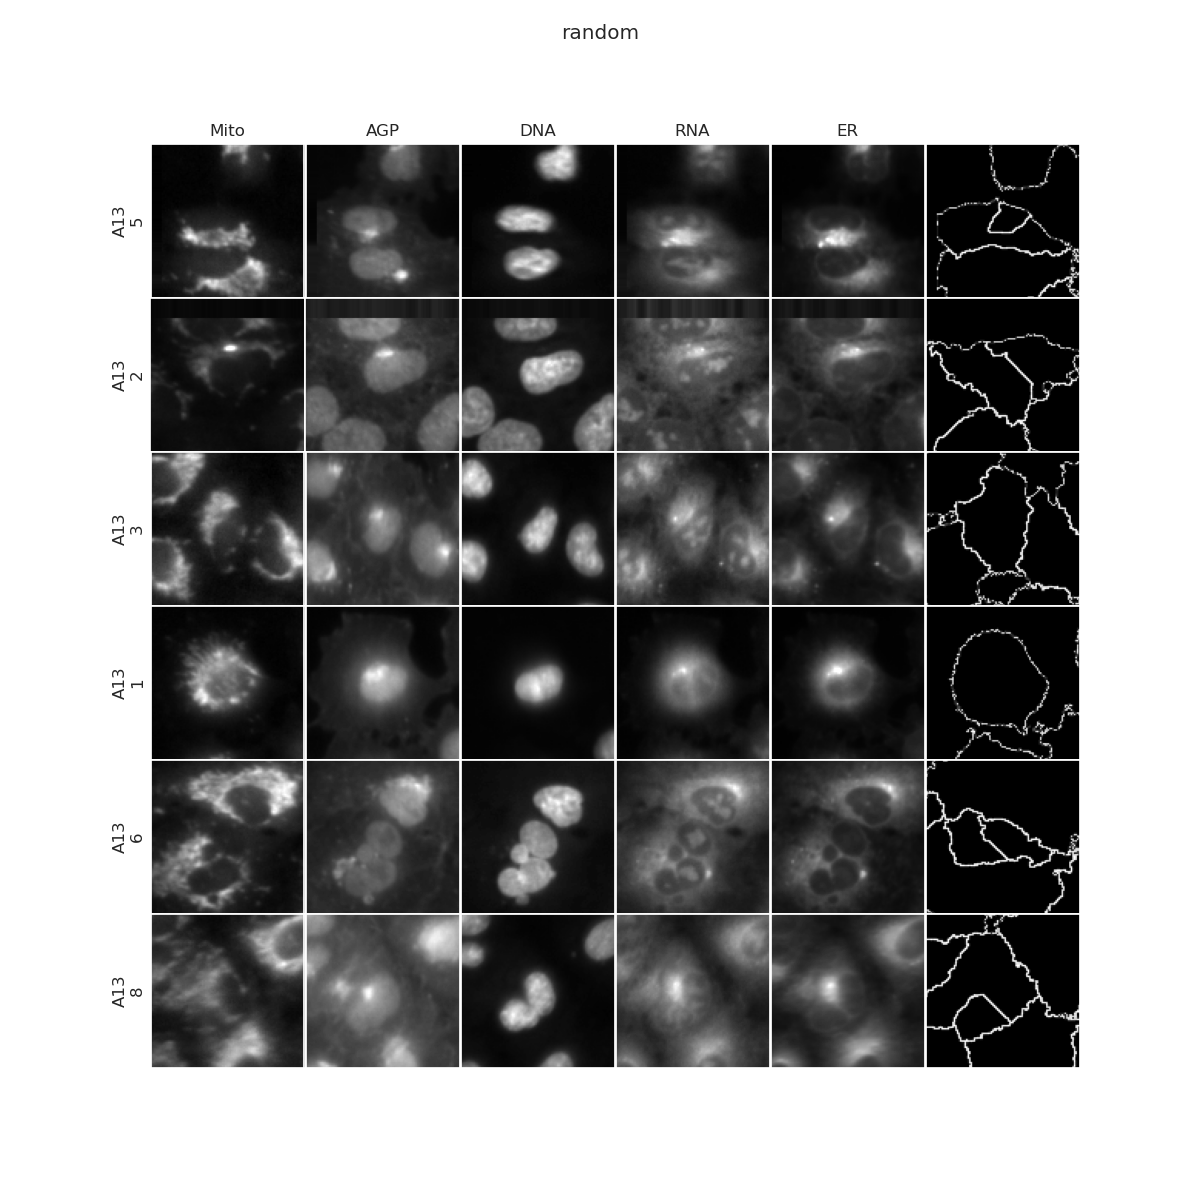

/home/ubuntu/bucket/projects/2015_10_05_DrugRepurposing_AravindSubramanian_GolubLab_Broad/2016_04_01_a549_48hr_batch1_compressed/images/SQ00015052/r01c13f05p01-ch5sk1fk1fl1.png
43 615
image_cropped (100, 93)
image_cropped (100, 100)
/home/ubuntu/bucket/projects/2015_10_05_DrugRepurposing_AravindSubramanian_GolubLab_Broad/2016_04_01_a549_48hr_batch1_compressed/images/SQ00015052/r01c13f05p01-ch4sk1fk1fl1.png
43 615
image_cropped (100, 93)
image_cropped (100, 100)
/home/ubuntu/bucket/projects/2015_10_05_DrugRepurposing_AravindSubramanian_GolubLab_Broad/2016_04_01_a549_48hr_batch1_compressed/images/SQ00015052/r01c13f05p01-ch1sk1fk1fl1.png
43 615
image_cropped (100, 93)
image_cropped (100, 100)
/home/ubuntu/bucket/projects/2015_10_05_DrugRepurposing_AravindSubramanian_GolubLab_Broad/2016_04_01_a549_48hr_batch1_compressed/images/SQ00015052/r01c13f05p01-ch3sk1fk1fl1.png
43 615
image_cropped (100, 93)
image_cropped (100, 100)
/home/ubuntu/bucket/projects/2015_10_05_DrugRepurposing_AravindSubra

In [54]:
%%time
df_p_s=df_p_s0.copy()

# df_p_s,_ = edgeCellFilter(df_p_s0, edge_margin = int((compressed_im_size/original_im_size)*(box_size/2));
# df_p_s,_ = edgeCellFilter(df_p_s0, edge_margin = int(box_size/2));
# df_p_s,_ = edgeCellFilter(df_p_s0);

dataset_rootdir="/home/ubuntu/bucket/projects/2015_10_05_DrugRepurposing_AravindSubramanian_GolubLab_Broad/"
images_dir=dataset_rootdir+"2016_04_01_a549_48hr_batch1_compressed/"

for ch in channels:
    df_p_s["PathName_Orig"+ch]=images_dir+"images/"+df_p_s["Image_Metadata_Plate"]
    df_p_s["FileName_Orig"+ch]=df_p_s["Image_FileName_Orig"+ch].apply(lambda x: x.replace("tiff","png"))

outlines_root_dir=dataset_rootdir+'/workspace/analysis/cell_outlines_Mito_Project/'

df_p_s["Path_Outlines"] = outlines_root_dir+\
df_p_s["Image_Metadata_Well"]+'-'+df_p_s["Image_Metadata_Plate"].astype(str)+'/outlines/'+\
df_p_s["Image_Metadata_Well"]+'_s'+df_p_s["Image_Metadata_Site"].astype(int).astype(str)+'--cell_outlines.png'

 
cell_selection_method='random'

df_samples,cp_features_analysis = extract_single_cell_samples.extract_single_cell_samples(df_p_s,n_cells,cell_selection_method);
y_labels=["Image_Metadata_Well","Image_Metadata_Site"]
sc_fig=visualize_n_SingleCell.visualize_n_SingleCell(channels,df_samples,box_size,\
            info_columns=y_labels,\
            outline=True,\
            title=cell_selection_method,\
            compressed=True,compressed_im_size=1080);

In [11]:
# df_samples,
df_p_s.shape,df_p_s0.shape

((2164, 2453), (2164, 2442))

<IPython.core.display.Javascript object>


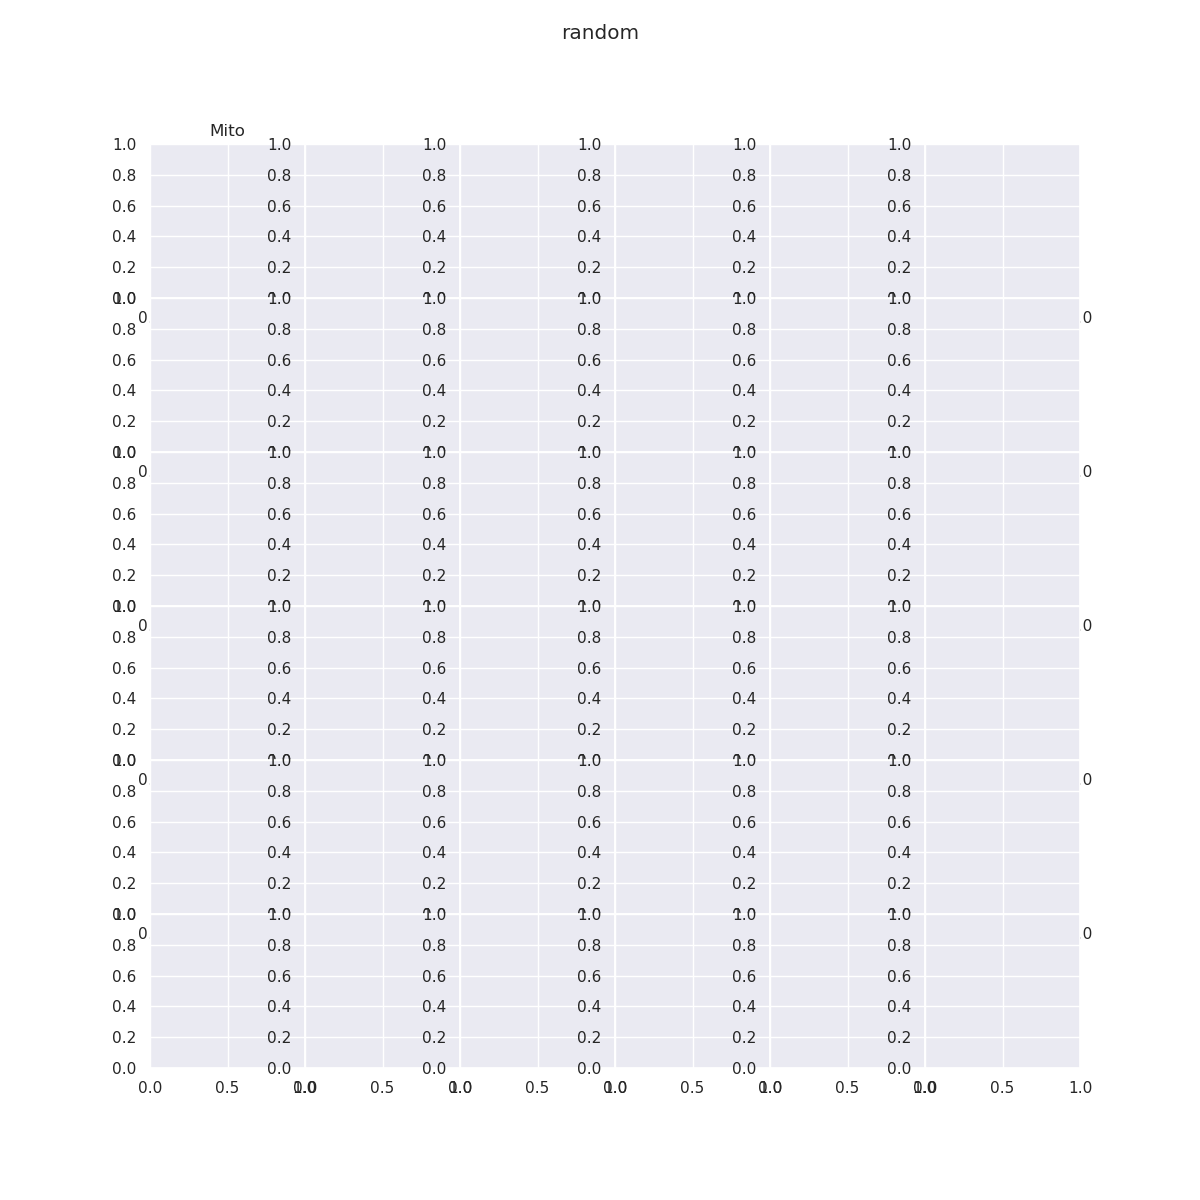

ERROR! Session/line number was not unique in database. History logging moved to new session 49
/home/ubuntu/bucket/projects/2015_10_05_DrugRepurposing_AravindSubramanian_GolubLab_Broad/2016_04_01_a549_48hr_batch1_compressed/images/SQ00015052/r01c13f07p01-ch5sk1fk1fl1.png
43 8
1080 1080
image_cropped (0, 0)


ValueError: can't extend empty axis 0 using modes other than 'constant' or 'empty'

In [14]:
visualize_n_SingleCell.visualize_n_SingleCell(channels,df_samples,box_size,\
            info_columns=y_labels,\
            outline=True,\
            title=cell_selection_method,\
            compressed=True,compressed_im_size=1080);

In [43]:
import skimage.io
image=skimage.io.imread('/home/ubuntu/bucket/projects/2015_10_05_DrugRepurposing_AravindSubramanian_GolubLab_Broad/2016_04_01_a549_48hr_batch1_compressed/images/SQ00015052/r01c13f04p01-ch5sk1fk1fl1.png')
xCenter,yCenter=451,1035
# image_cropped = crop_single_cell_image(image,xCenter,yCenter,halfBoxSize)

In [45]:
halfBoxSize=50
im_w,im_h=image.shape;
image_cropped=image[np.maximum(yCenter-halfBoxSize,0):np.minimum(yCenter+halfBoxSize,im_w),\
                    np.maximum(xCenter-halfBoxSize,0):np.minimum(xCenter+halfBoxSize,im_h)]

In [46]:
image_cropped.shape

(95, 100)

In [30]:
np.maximum(yCenter+halfBoxSize,im_w)

1080

In [31]:
np.minimum(yCenter-halfBoxSize,0)

-42

In [37]:
image_cropped.shape

(100, 100)

In [35]:
# image_cropped.shape
np.pad(image_cropped, ((before_y_pad, after_y_pad), (before_x_pad, after_x_pad)), 'minimum').shape

(101, 101)

In [53]:
im_w,im_h=image.shape;
print(im_w,im_h)
#     image_cropped=np.zeros((halfBoxSize*2,halfBoxSize*2))
before_y_pad=0
after_y_pad=0
before_x_pad=0
after_x_pad=0

if xCenter-halfBoxSize<0:
    before_x_pad=abs(xCenter-halfBoxSize)

if yCenter-halfBoxSize<0:
    before_y_pad=abs(yCenter-halfBoxSize)

if xCenter+halfBoxSize>im_w:
    after_x_pad=abs(im_w-xCenter-halfBoxSize)

if yCenter+halfBoxSize>im_h:
    after_y_pad=abs(im_h-yCenter-halfBoxSize)

image_cropped=image[np.maximum(yCenter-halfBoxSize,0):np.minimum(yCenter+halfBoxSize,im_w),\
                    np.maximum(xCenter-halfBoxSize,0):np.minimum(xCenter+halfBoxSize,im_h)]
print('image_cropped',image_cropped.shape)
if np.max([before_y_pad, after_y_pad,before_x_pad, after_x_pad])>0:
    image_cropped=np.pad(image_cropped, ((before_y_pad, after_y_pad), (before_x_pad, after_x_pad)), 'minimum')
print('image_cropped',image_cropped.shape)


1080 1080
image_cropped (95, 100)
image_cropped (100, 100)


In [51]:
yCenter,im_h

(1035, 1080)

In [49]:
halfBoxSize

50

In [48]:
before_y_pad, after_y_pad,before_x_pad, after_x_pad

(0, 45, 0, 0)

In [ ]:
ls /home/ubuntu/bucket/projects/2015_10_05_DrugRepurposing_AravindSubramanian_GolubLab_Broad/workspace/analysis/cell_outlines_Mito_Project/A10-SQ00015195

In [ ]:
# ls /home/ubuntu/bucket/projects/2015_10_05_DrugRepurposing_AravindSubramanian_GolubLab_Broad/workspace/analysis/2016_04_01_a549_48hr_batch1_Mito_Project/SQ00015195/analysis/A10-SQ00015195/outlines/

In [ ]:
ls /home/ubuntu/bucket/projects/2015_10_05_DrugRepurposing_AravindSubramanian_GolubLab_Broad/

In [ ]:
# def unarchive_file(f2unarchive,bucket_name,user_profile):
#     """
#     unarchive input file

#     Inputs:
#     bucket_name: eg, pooled-cell-painting, imaging-plateform
#     user_profile: profile name that is used for accessing the above bucket (check in sudo vim ~/.aws/credentials)
#     proj_path: path to the project eg,2018_11_20_Periscope_Calico/workspace/analysis/

#     output:
#     command to run
#     """

#     cmd='aws s3api  restore-object  --profile '+user_profile+\
#             ' --bucket '+bucket_name+'  --key projects/2018_11_20_Periscope_Calico/workspace/analysis/'+f2unarchive+'   --restore-request GlacierJobParameters={"Tier"="Standard"}'
#     return cmd




# for p in plates:
#     for w in wells:
#         for s in sites:
#             f2unarchive=batch+'/'+p+'-'+w+'-'+s+'/CorrDNA_Site_'+s+'_Overlay.png'
#             cmd='aws s3api  restore-object  --profile '+user_profile+\
#             ' --bucket '+bucket_name+'  --key projects/2018_11_20_Periscope_Calico/workspace/analysis/'+f2unarchive+'   --restore-request GlacierJobParameters={"Tier"="Standard"}'
#             print(cmd)
# #             os.system(cmd)